In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [26]:
d_f=pd.read_csv(r"C:\Users\Karan\Downloads\crime_data.csv")

In [27]:
d_f


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [28]:
d_f.shape

(50, 5)

In [29]:
d_f.axes

[RangeIndex(start=0, stop=50, step=1),
 Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')]

In [75]:
new_df=d_f.rename({"Unnamed: 0":"country"},axis=1)

In [76]:
new_df

,country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [78]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
x=stdscaler.fit_transform(new_df.iloc[:,1:])

In [79]:
new_df.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [80]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# herirchical clustering

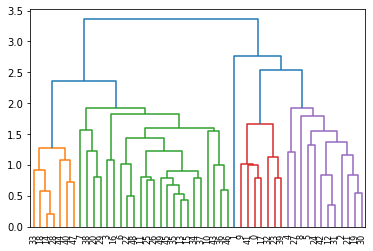

In [137]:
dendrogram=sch.dendrogram(sch.linkage(x,method='average'))

In [142]:
#create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
#from above dendogram we have got n_clusters=3

In [143]:
y_hc=hc.fit_predict(x)

In [159]:
y_hc

array([1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [145]:
new_df["h_clust"]=y_hc

In [146]:
new_df


,country,Murder,Assault,UrbanPop,Rape,h_clust,clusterd_kmeans,clusterid_dbscan
0,Alabama,13.2,236,58,21.2,1,2,0
1,Alaska,10.0,263,48,44.5,1,1,-1
2,Arizona,8.1,294,80,31.0,2,1,0
3,Arkansas,8.8,190,50,19.5,0,2,0
4,California,9.0,276,91,40.6,2,1,0
5,Colorado,7.9,204,78,38.7,2,1,0
6,Connecticut,3.3,110,77,11.1,0,0,0
7,Delaware,5.9,238,72,15.8,0,0,0
8,Florida,15.4,335,80,31.9,2,1,0
9,Georgia,17.4,211,60,25.8,1,2,0


In [147]:
new_df.sort_values("h_clust")

,country,Murder,Assault,UrbanPop,Rape,h_clust,clusterd_kmeans,clusterid_dbscan
24,Missouri,9.0,178,70,28.2,0,1,0
48,Wisconsin,2.6,53,66,10.8,0,3,0
25,Montana,6.0,109,53,16.4,0,3,0
26,Nebraska,4.3,102,62,16.5,0,3,0
28,New Hampshire,2.1,57,56,9.5,0,3,0
29,New Jersey,7.4,159,89,18.8,0,0,0
33,North Dakota,0.8,45,44,7.3,0,3,0
34,Ohio,7.3,120,75,21.4,0,0,0
35,Oklahoma,6.6,151,68,20.0,0,0,0
36,Oregon,4.9,159,67,29.3,0,0,0


In [148]:
from sklearn  import metrics
metrics.silhouette_score(x,y_hc,metric="euclidean")

0.36924314190439733

# k means

In [149]:
new_df

,country,Murder,Assault,UrbanPop,Rape,h_clust,clusterd_kmeans,clusterid_dbscan
0,Alabama,13.2,236,58,21.2,1,2,0
1,Alaska,10.0,263,48,44.5,1,1,-1
2,Arizona,8.1,294,80,31.0,2,1,0
3,Arkansas,8.8,190,50,19.5,0,2,0
4,California,9.0,276,91,40.6,2,1,0
5,Colorado,7.9,204,78,38.7,2,1,0
6,Connecticut,3.3,110,77,11.1,0,0,0
7,Delaware,5.9,238,72,15.8,0,0,0
8,Florida,15.4,335,80,31.9,2,1,0
9,Georgia,17.4,211,60,25.8,1,2,0


In [150]:
from sklearn.cluster import KMeans

In [151]:
kmeans=KMeans(n_clusters=2,random_state=20)
kmeans.fit(df_1)

KMeans(n_clusters=2, random_state=20)

In [152]:
kmeans.cluster_centers_

array([[0.43684415, 0.49403447, 0.69983598, 0.45136284, 0.4516129 ],
       [0.3950539 , 0.32732516, 0.35414808, 0.21093431, 3.63157895]])

In [153]:
kmeans.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0])

In [154]:
kmeans.inertia_

24.845967331660386

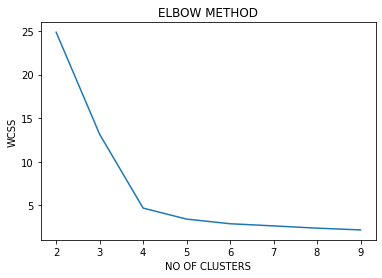

In [155]:
wcss=[]
for i in range (2,10):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,10),wcss)
plt.title("ELBOW METHOD")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("WCSS")
plt.show()

In [156]:
#from above we get elbow point at 4i.e k value(no.of clusters)=4
from sklearn.cluster import KMeans
clust_new=KMeans(4)
clust_new.fit(x)


KMeans(n_clusters=4)

In [122]:
clust_new.labels_

array([2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 3, 2, 3, 1, 0, 1,
       3, 2, 1, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 3, 0])

In [123]:
clust_new.n_iter_

4

In [124]:
clust_new.inertia_

57.55425863091106

In [125]:
#assign clusters to data set
new_df["clusterd_kmeans"]=clust_new.labels_#used to add column to dataset

In [127]:
new_df

,country,Murder,Assault,UrbanPop,Rape,h_clust,clusterd_kmeans,clusterid_dbscan
0,Alabama,13.2,236,58,21.2,3,2,0
1,Alaska,10.0,263,48,44.5,2,1,-1
2,Arizona,8.1,294,80,31.0,1,1,0
3,Arkansas,8.8,190,50,19.5,0,2,0
4,California,9.0,276,91,40.6,1,1,0
5,Colorado,7.9,204,78,38.7,1,1,0
6,Connecticut,3.3,110,77,11.1,0,0,0
7,Delaware,5.9,238,72,15.8,0,0,0
8,Florida,15.4,335,80,31.9,1,1,0
9,Georgia,17.4,211,60,25.8,3,2,0


In [99]:
from sklearn.cluster import DBSCAN

# DBSCAN

In [128]:
#building the model
dbscan=DBSCAN(eps=2,min_samples=6)#min samples=dimensions+1 i.e in this dataset we have 6 dimensions so we take 5+1=6
dbscan.fit(x)

DBSCAN(eps=2, min_samples=6)

In [129]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [130]:
new_df["clusterid_dbscan"]=dbscan.labels_

In [131]:
new_df

,country,Murder,Assault,UrbanPop,Rape,h_clust,clusterd_kmeans,clusterid_dbscan
0,Alabama,13.2,236,58,21.2,3,2,0
1,Alaska,10.0,263,48,44.5,2,1,-1
2,Arizona,8.1,294,80,31.0,1,1,0
3,Arkansas,8.8,190,50,19.5,0,2,0
4,California,9.0,276,91,40.6,1,1,0
5,Colorado,7.9,204,78,38.7,1,1,0
6,Connecticut,3.3,110,77,11.1,0,0,0
7,Delaware,5.9,238,72,15.8,0,0,0
8,Florida,15.4,335,80,31.9,1,1,0
9,Georgia,17.4,211,60,25.8,3,2,0


<AxesSubplot:>

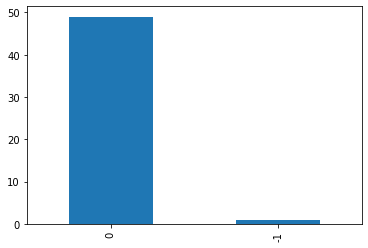

In [132]:
new_df["clusterid_dbscan"].value_counts().plot(kind="bar")

In [133]:
from sklearn  import metrics
metrics.silhouette_score(x,dbscan.labels_,metric="euclidean")#(standardized_input,modelsarray_,metric="euclidean")

0.23455598753159795